In [ ]:
library(ggplot2)
library(data.table)
library(dplyr)
library(gtrendsR)
library(reshape2)
library(benford.analysis)
library(patchwork)
library(tidyverse)

In [ ]:
csv = read.csv('ghed_clean.csv',header=TRUE)
column_names <- names(csv)
print(column_names)

  [1] "X"                "country"          "code"            
  [4] "region"           "income"           "year"            
  [7] "che_gdp"          "che_pc_usd"       "che"             
 [10] "gghed"            "pvtd"             "dom_che"         
 [13] "gghed_che"        "pvtd_che"         "oops_che"        
 [16] "vpp_che"          "gghed_gdp"        "gghed_gge"       
 [19] "gghed_pc_usd"     "pvtd_pc_usd"      "oop_pc_usd"      
 [22] "cfa_che"          "gfa_che"          "chi_che"         
 [25] "shi_che"          "vfa_che"          "vhi_che"         
 [28] "gge_gdp"          "gdp_pc_usd"       "fs"              
 [31] "fs1"              "fs11"             "fs3"             
 [34] "fs5"              "fs6"              "fs61"            
 [37] "hf"               "hf1"              "hf11"            
 [40] "hf12"             "hf121"            "hf2"             
 [43] "hf21"             "hf3"              "gdp"             
 [46] "pfc"              "gge"              "ppp"      

In [ ]:
spain = csv[csv$country == "Spain",]
spain = spain[-c(22),]

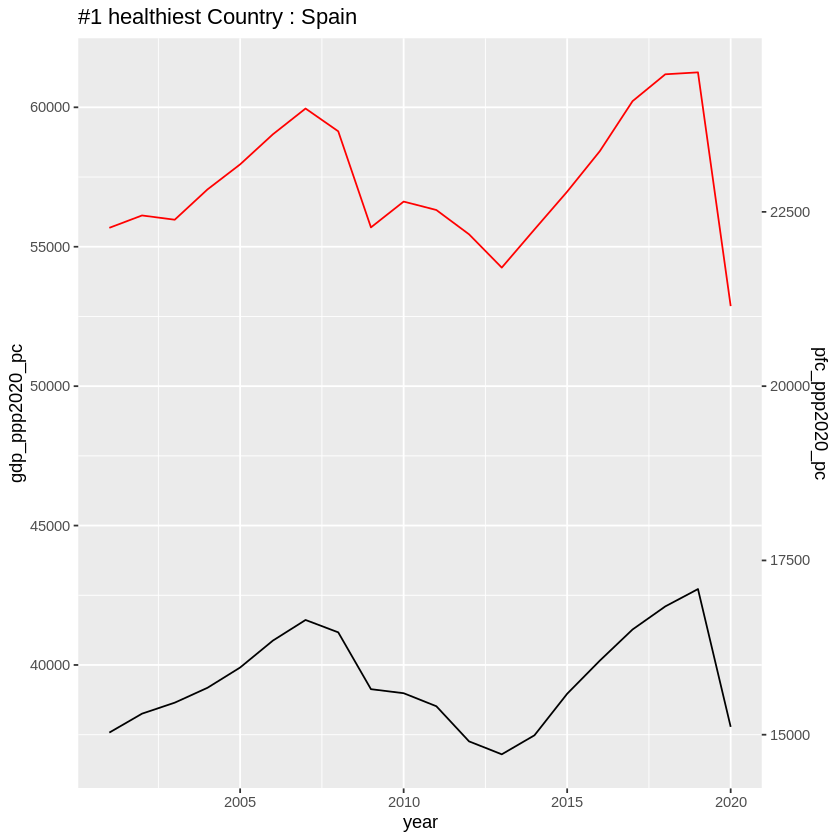

In [ ]:
spain20gdpd <- head(spain[order(spain$gdp_ppp2020_pc,decreasing=TRUE),],20)

spain1 = ggplot(data = spain20gdpd)+
  geom_line(aes(x=year,y=gdp_ppp2020_pc))+
  geom_line(aes(x=year,y=pfc_ppp2020_pc*2.5),col='red')+
  scale_y_continuous(
  # Features of the first axis
    name = "gdp_ppp2020_pc",

    # Add a second axis and specify its features
    sec.axis = sec_axis(~./2.5, name="pfc_ppp2020_pc"))+
      ggtitle("#1 healthiest Country : Spain")
spain1

In [ ]:
italy = csv[csv$country == "Italy",]
italy = italy[-c(22),]

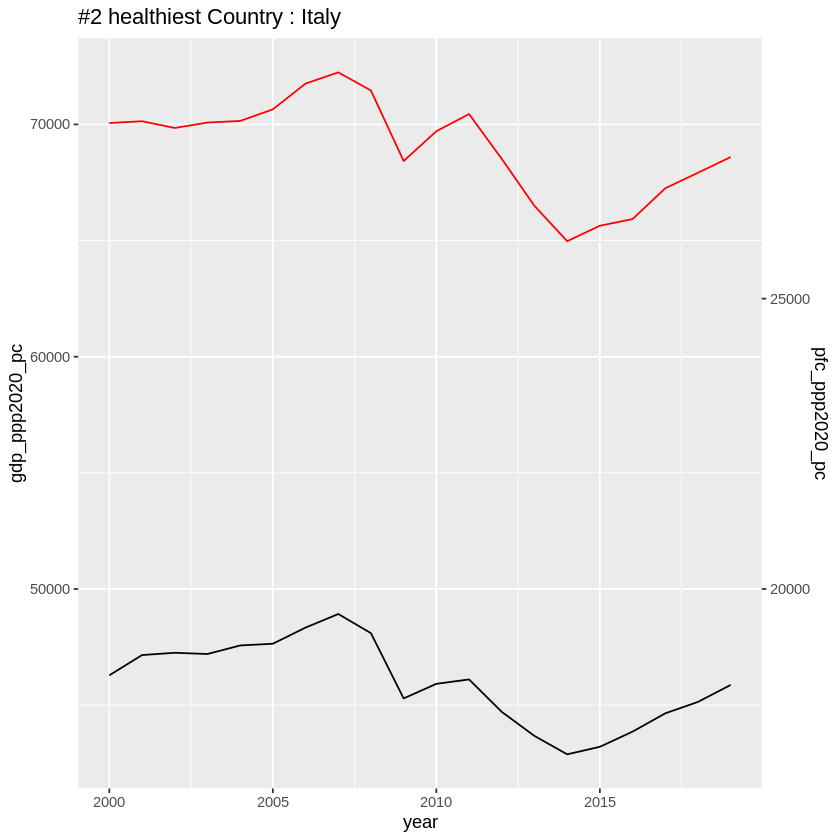

In [ ]:
italy20gdpd <- head(italy[order(italy$gdp_ppp2020_pc,decreasing=TRUE),],20)

italy1 = ggplot(data = italy20gdpd)+
  geom_line(aes(x=year,y=gdp_ppp2020_pc))+
  geom_line(aes(x=year,y=pfc_ppp2020_pc*2.5),col='red')+
  scale_y_continuous(
  # Features of the first axis
    name = "gdp_ppp2020_pc",

    # Add a second axis and specify its features
    sec.axis = sec_axis(~./2.5, name="pfc_ppp2020_pc"))+
      ggtitle("#2 healthiest Country : Italy")
italy1

In [ ]:
iceland = csv[csv$country == "Iceland",]
iceland = iceland[-c(22),]

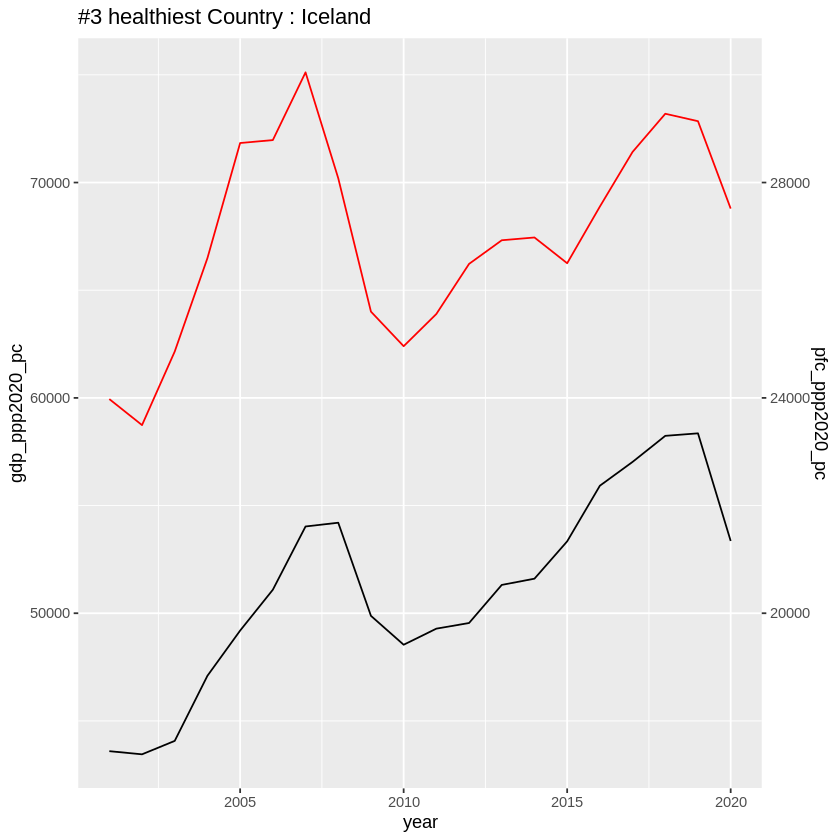

In [ ]:
iceland20gdpd <- head(iceland[order(iceland$gdp_ppp2020_pc,decreasing=TRUE),],20)

ice1 = ggplot(data = iceland20gdpd)+
  geom_line(aes(x=year,y=gdp_ppp2020_pc))+
  geom_line(aes(x=year,y=pfc_ppp2020_pc*2.5),col='red')+
  scale_y_continuous(
  # Features of the first axis
    name = "gdp_ppp2020_pc",

    # Add a second axis and specify its features
    sec.axis = sec_axis(~./2.5, name="pfc_ppp2020_pc"))+
      ggtitle("#3 healthiest Country : Iceland")
ice1

In [ ]:
switzerland = csv[csv$country == "Switzerland",]
switzerland = switzerland[-c(22),]

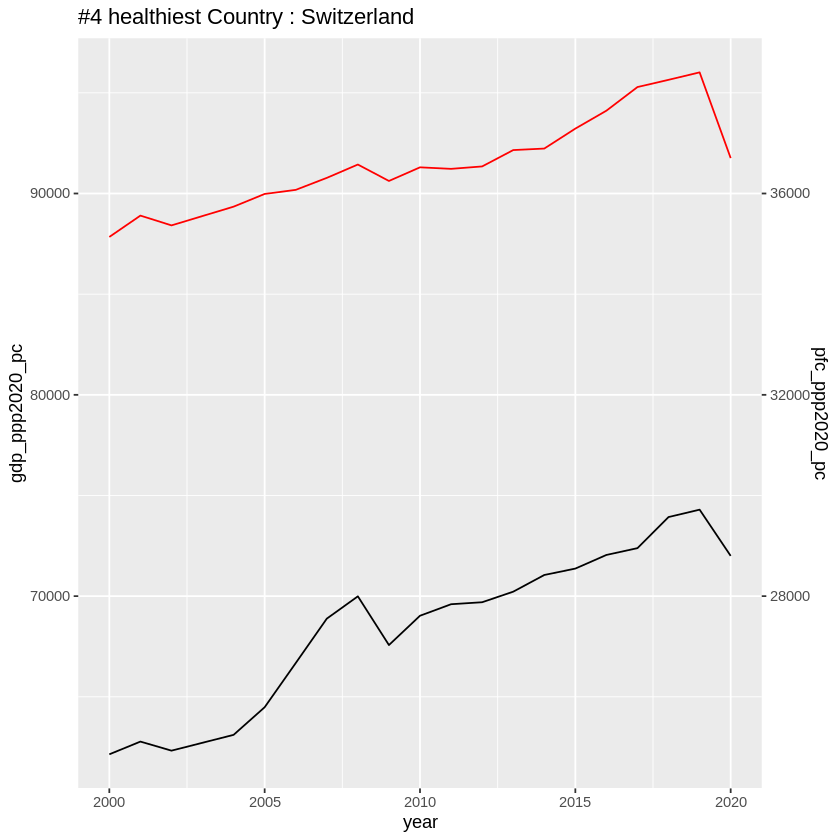

In [ ]:
switzerland20gdpd <- head(switzerland[order(switzerland$gdp_ppp2020_pc,decreasing=TRUE),],20)

swit1 = ggplot(data = switzerland20gdpd)+
  geom_line(aes(x=year,y=gdp_ppp2020_pc))+
  geom_line(aes(x=year,y=pfc_ppp2020_pc*2.5),col='red')+
  scale_y_continuous(
  # Features of the first axis
    name = "gdp_ppp2020_pc",

    # Add a second axis and specify its features
    sec.axis = sec_axis(~./2.5, name="pfc_ppp2020_pc"))+
      ggtitle("#4 healthiest Country : Switzerland")
swit1

In [ ]:
japan = csv[csv$country == "Japan",]
japan = japan[-c(22),]

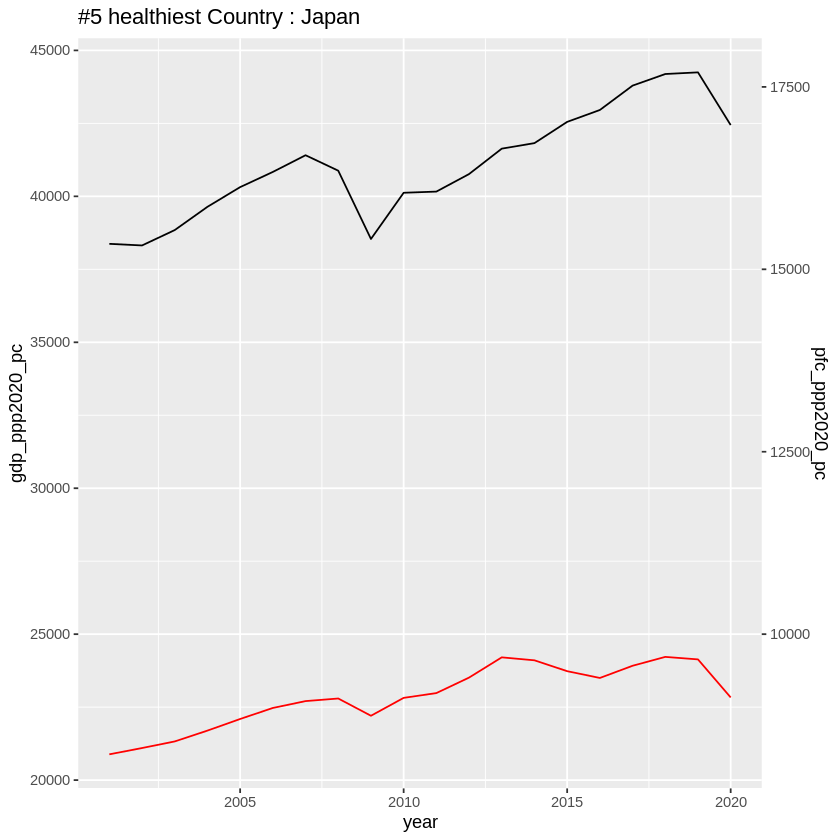

In [ ]:
japan20gdpd <- head(japan[order(japan$gdp_ppp2020_pc,decreasing=TRUE),],20)

japan1 = ggplot(data = japan20gdpd)+
  geom_line(aes(x=year,y=gdp_ppp2020_pc))+
  geom_line(aes(x=year,y=pfc_ppp2020_pc*1),col='red')+
  scale_y_continuous(
  # Features of the first axis
    name = "gdp_ppp2020_pc",

    # Add a second axis and specify its features
    sec.axis = sec_axis(~./2.5, name="pfc_ppp2020_pc"))+
      ggtitle("#5 healthiest Country : Japan")
japan1

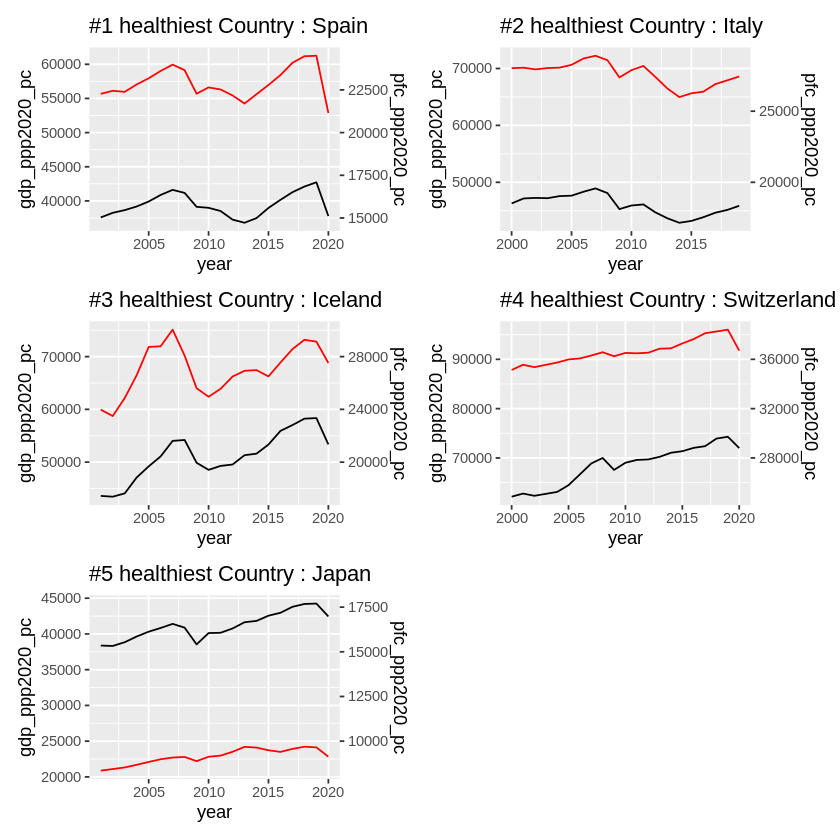

In [ ]:
spain1+italy1+ice1+swit1+japan1+plot_layout(widths = c(3, 3))

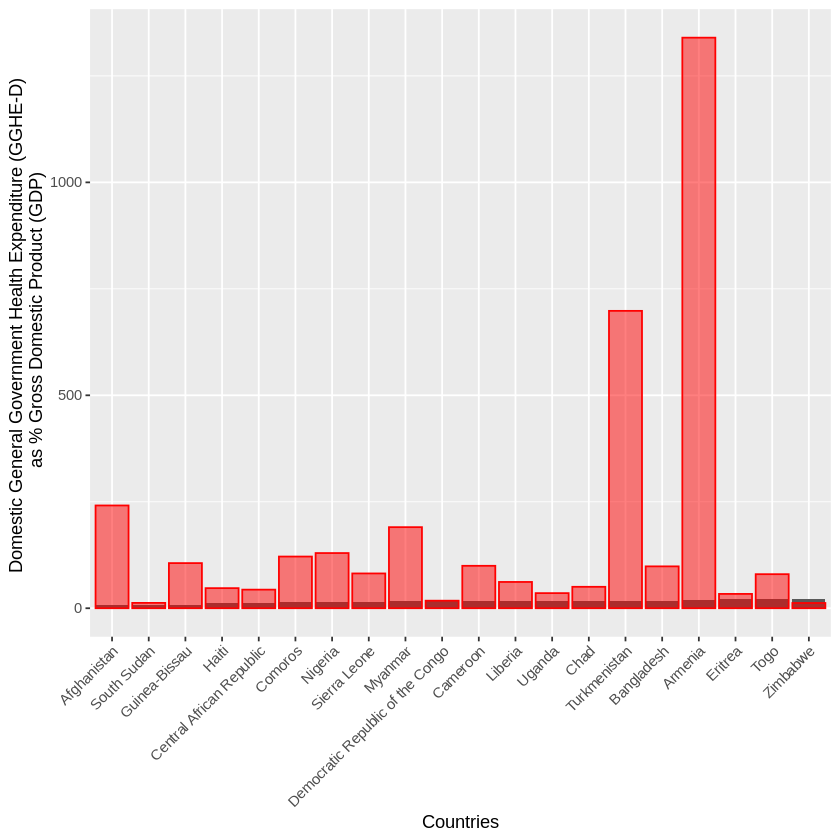

In [ ]:
c2020 = csv[csv$year == "2020",]

top20_oop = head(c2020[order(c2020$gghed_che,decreasing=FALSE),],20)
p9 <- ggplot(data = top20_oop)+
      geom_col(aes(x= reorder(country, gghed_che), y=gghed_che))+
      geom_col(aes(x= country,y=hf3_ppp2020_pc),col='red',fill='red',alpha = 0.5)
p9 + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
  labs(x= 'Countries', y= 'Domestic General Government Health Expenditure (GGHE-D) \n as % Gross Domestic Product (GDP)')


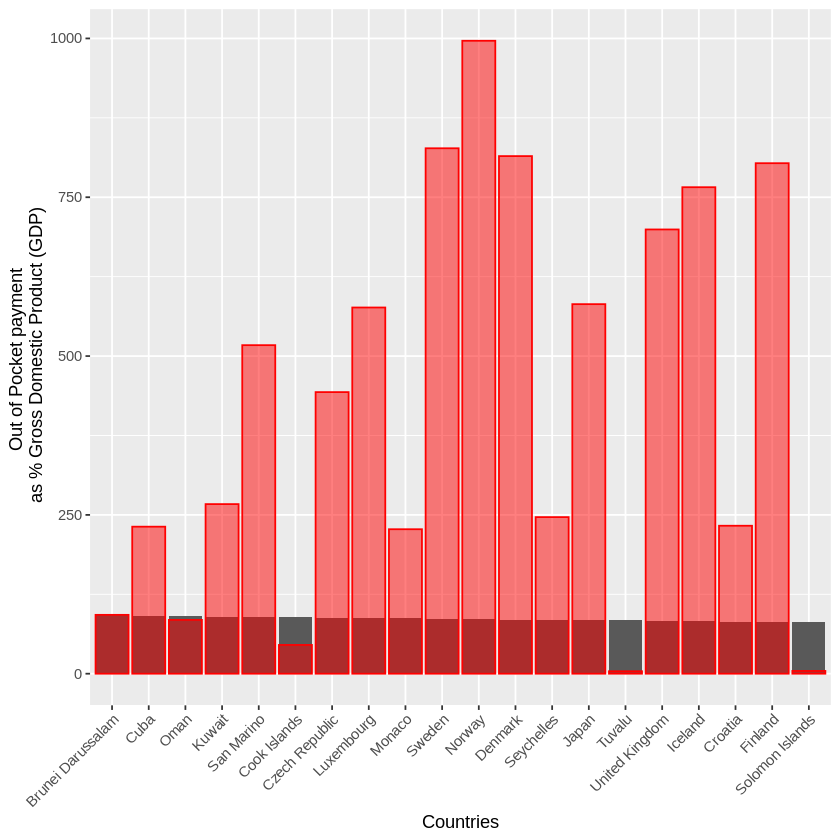

In [ ]:
top20_gghed <- head(c2020[order(c2020$gghed_che,decreasing=TRUE),],20)
p10 <- ggplot(data = top20_gghed)+
      geom_col(aes(x= reorder(country, -gghed_che),y=gghed_che))+
      geom_col(aes(x= country,y=hf3_ppp2020_pc),col='red',fill='red',alpha = 0.5)
p10 + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))+
  labs(x= 'Countries', y= 'Out of Pocket payment \n as % Gross Domestic Product (GDP)')


Benford object:
 
Data: ch 
Number of observations used = 3982 
Number of obs. for second order = 3980 
First digits analysed = 1

Mantissa: 

   Statistic  Value
        Mean  0.490
         Var  0.079
 Ex.Kurtosis -1.136
    Skewness  0.077


The 5 largest deviations: 

  digits absolute.diff
1      2         91.80
2      7         36.92
3      8         36.69
4      5         26.30
5      3         12.49

Stats:

	Pearson's Chi-squared test

data:  ch
X-squared = 27.81, df = 8, p-value = 0.0005118


	Mantissa Arc Test

data:  ch
L2 = 0.0027447, df = 2, p-value = 1.792e-05

Mean Absolute Deviation (MAD): 0.006327964
MAD Conformity - Nigrini (2012): Acceptable conformity
Distortion Factor: -3.537561

Remember: Real data will never conform perfectly to Benford's Law. You should not focus on p-values!

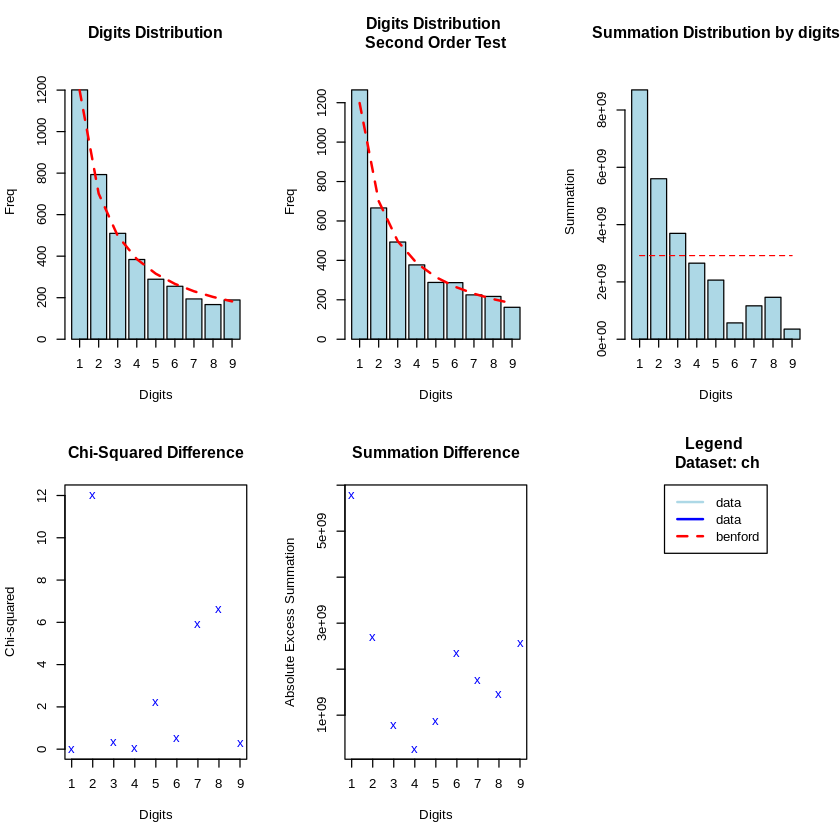

In [ ]:

ch <- as.numeric(as.character(csv$che))

ch <- ch[ch > 0]

trends = benford(ch, number.of.digits = 1, discrete = T, sign = "positive")
trends
plot(trends)

In [ ]:
dbenford <- function(n){
  if(n %in% 1:9){
    return(log((n+1)/n, base = 10))
  } else{
    return(0)
  }
}

ch <- as.numeric(as.character(csv$che))

first_digits <- as.integer(substr(ch, 1, 1))
freq_table <- table(first_digits)
total_count <- sum(freq_table)
percentage <- (freq_table / total_count)
x_range <- 1:9
pmf <- lapply(x_range,dbenford)

Digit,Observed.first_digits,Observed.Freq,Expected
<int>,<fct>,<dbl>,<dbl>
1,1,0.30085384,0.30103000
2,2,0.19914616,0.17609126
3,3,0.12757408,0.12493874
4,4,0.09618282,0.09691001
5,5,0.07207433,0.07918125
6,6,0.06353591,0.06694679
7,7,0.04871924,0.05799195
8,8,0.04168759,0.05115252
9,9,0.04721246,0.04575749


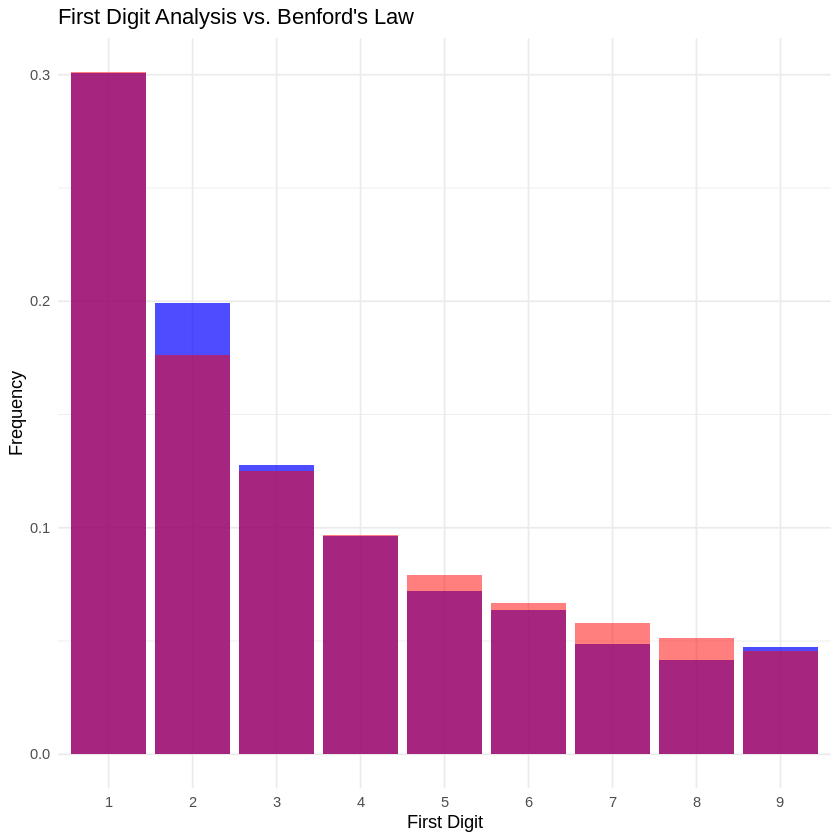

In [ ]:
library(tidyverse)

# Create a data frame for plotting
data_plot <- data.frame(
  Digit = 1:9,
  Observed = percentage[2:10],
  Expected = unlist(pmf)
)


data_plot

ggplot(data_plot, aes(x = factor(Digit))) +
  geom_bar(aes(y = Observed.Freq), stat = "identity", fill = "blue", alpha = 0.7, position = position_dodge(width = 0.8)) +
  geom_bar(aes(y = Expected), stat = "identity", fill = "red", alpha = 0.5, position = position_dodge(width = 0.8)) +
  labs(title = "First Digit Analysis vs. Benford's Law",
       x = "First Digit",
       y = "Frequency") +
  theme_minimal()

In [ ]:
insurance_spent <- csv$chi_che
out_of_pocket <- csv$oops_che

cor_test_result <- cor.test(insurance_spent, out_of_pocket, method = "pearson")

print(cor_test_result)


	Pearson's product-moment correlation

data:  insurance_spent and out_of_pocket
t = -18.274, df = 3777, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3140367 -0.2554420
sample estimates:
       cor 
-0.2850055 



In [ ]:
df2<-subset(csv, chi_che!=0 | chi_che!=1)

df2 <- df2[!is.na(df2$chi_che),]
df2 <- df2[!is.na(df2$oops_che),]

`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'


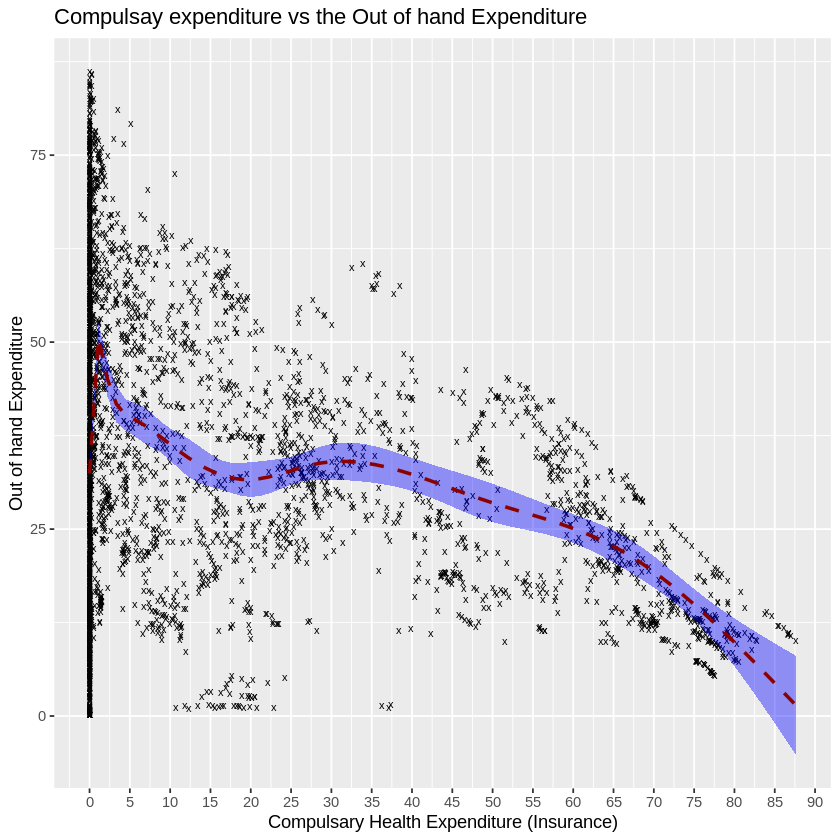

In [ ]:

# Basic scatter plot
ggplot(df2, aes(x=chi_che, y=oops_che)) + geom_point(size=2, shape='x')+
  geom_smooth(method = 'gam',  linetype="dashed",
             color="darkred", fill="blue") + scale_x_continuous(n.breaks = 30) +
               xlab("Compulsary Health Expenditure (Insurance)") +
  ylab("Out of hand Expenditure") +
  ggtitle("Compulsay expenditure vs the Out of hand Expenditure")



In [ ]:
 #ANOVA model
anova_model <- aov(pfc_ppp2020_pc ~ country, data = csv)

# ANOVA table
anova_table <- summary(anova_model)

# p-value
p_value <- anova_table[[1]]$"Pr(>F)"[1]

# Setting  significance level
alpha <- 0.05

# hypothesis test
if (p_value < alpha) {
  cat("Reject the null hypothesis. There are significant differences in means.\n")
} else {
  cat("Fail to reject the null hypothesis. There is not enough evidence of significant differences.\n")
}


cat("P-value:", p_value, "\n")

Reject the null hypothesis. There are significant differences in means.
P-value: 0 


In [ ]:
lm_model <- lm(pfc_ppp2020_pc ~ country, data = csv)
summary(lm_model)


Call:
lm(formula = pfc_ppp2020_pc ~ country, data = csv)

Residuals:
   Min     1Q Median     3Q    Max 
-22784   -702      0    740  37412 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                                1196.65     618.87   1.934 0.053237
countryAlbania                             7070.30     854.13   8.278  < 2e-16
countryAlgeria                             3204.72     854.13   3.752 0.000178
countryAndorra                            33337.94     854.13  39.032  < 2e-16
countryAngola                              1857.76     854.13   2.175 0.029689
countryAntigua and Barbuda                12203.47     854.13  14.288  < 2e-16
countryArgentina                          13420.86     854.13  15.713  < 2e-16
countryArmenia                             6731.63     854.13   7.881 4.19e-15
countryAustralia                          27789.66     854.13  32.536  < 2e-16
countryAustria                            28145.45   